In [15]:
%config IPCompleter.greedy=True
import ROOT
import matplotlib.pyplot as plt
import numpy

from DataFormats.FWLite import Events, Handle
pythiaCP5_events = Events("RootFiles/monoZprime_CP5_withWeights.root")
pythiaCUETP8M1_events = Events("RootFiles/monoZprime_CUETP8M1_withWeights.root")
genJetsHandle = Handle("std::vector<reco::GenJet>")
genInfo = Handle("GenEventInfoProduct")

In [16]:
def processEvents(events):
    num_constituents = []
    pt1_frac = []
    pt2_frac = []
    pt3_frac = []
    pt123_frac = []
    leading_pdgids = []
    psweights = []
    for i, event in enumerate(events):
        event.getByLabel ("ak4GenJetsNoNu", genJetsHandle)
        event.getByLabel ("generator", genInfo)
        central_weight = genInfo.product().weights()[0]
        weights = [w/central_weight for w in genInfo.product().weights()]
        genJets = genJetsHandle.product()
        leading_jet = genJets.at(0)
        if leading_jet.pt() < 200:
            continue
        psweights.append(weights[2:14])
        constits = leading_jet.getJetConstituentsQuick()
        num_constituents.append(constits.size())
        pt123 = 0
        for j, cand in enumerate(constits):
            if j < 1:
                pt1_frac.append(cand.pt()/leading_jet.pt())
                pt123 += cand.pt()
                leading_pdgids.append(cand.pdgId())
            elif j < 2: 
                pt2_frac.append(cand.pt()/leading_jet.pt())
                pt123 += cand.pt()
                leading_pdgids.append(cand.pdgId())
            elif j < 3:
                pt3_frac.append(cand.pt()/leading_jet.pt())
                pt123 += cand.pt()
                leading_pdgids.append(cand.pdgId())
            if j == constits.size()-1 or j == 2:
                pt123_frac.append(pt123/leading_jet.pt())
                break
    return (psweights, num_constituents, leading_pdgids, pt1_frac, pt2_frac, pt3_frac, pt123_frac)

In [17]:
weights_cp5, num_constituents_cp5, leading_pdgids_cp5, pt1_frac_cp5, pt2_frac_cp5, pt3_frac_cp5, pt123_frac_cp5 = processEvents(pythiaCP5_events)
weights, num_constituents, leading_pdgids, pt1_frac, pt2_frac, pt3_frac, pt123_frac = processEvents(pythiaCUETP8M1_events)

In [18]:
print len(weights_cp5)
print len(num_constituents_cp5)

9998
9998


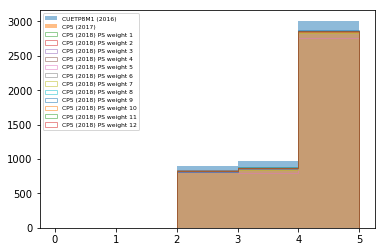

In [37]:
def makeVariationsPlot(var, weights, cp5_var, cp5_weights, bins, range, noPSweights=False):
    plt.hist(var, bins, range=range, histtype=('step' if noPSweights else 'bar'), alpha=0.5, label='CUETP8M1 (2016)');
    plt.hist(cp5_var, bins, range=range, histtype=('step' if noPSweights else 'bar'), alpha=0.5, label='CP5 (2017)');
    if not noPSweights:
        plt.hist(cp5_var, bins, weights=[entry[0] for entry in cp5_weights], range=range, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 1');
        plt.hist(cp5_var, bins, weights=[entry[1] for entry in cp5_weights], range=range, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 2');
        plt.hist(cp5_var, bins, weights=[entry[2] for entry in cp5_weights], range=range, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 3');
        plt.hist(cp5_var, bins, weights=[entry[3] for entry in cp5_weights], range=range, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 4');
        plt.hist(cp5_var, bins, weights=[entry[4] for entry in cp5_weights], range=range, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 5');
        plt.hist(cp5_var, bins, weights=[entry[5] for entry in cp5_weights], range=range, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 6');
        plt.hist(cp5_var, bins, weights=[entry[6] for entry in cp5_weights], range=range, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 7');
        plt.hist(cp5_var, bins, weights=[entry[7] for entry in cp5_weights], range=range, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 8');
        plt.hist(cp5_var, bins, weights=[entry[8] for entry in cp5_weights], range=range, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 9');
        plt.hist(cp5_var, bins, weights=[entry[9] for entry in cp5_weights], range=range, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 10');
        plt.hist(cp5_var, bins, weights=[entry[10] for entry in cp5_weights], range=range, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 11');
        plt.hist(cp5_var, bins, weights=[entry[11] for entry in cp5_weights], range=range, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 12');
        plt.legend(prop={'size': 6})
    else:
        plt.legend()
    plt.show()
makeVariationsPlot(num_constituents, weights, num_constituents_cp5, weights_cp5, 5, (0,5))

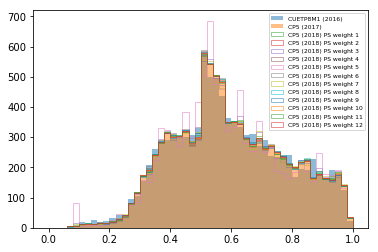

In [24]:
makeVariationsPlot(pt1_frac, weights, pt1_frac_cp5, weights_cp5, 50, (0,1))

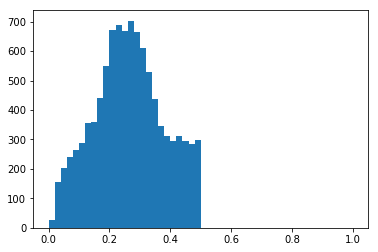

In [25]:
plt.hist(pt2_frac, bins=50, range=(0,1));

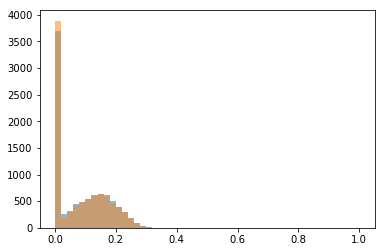

In [26]:
plt.hist(pt3_frac, bins=50, range=(0,1), alpha=0.5, label='CUETP8M1 (2016)');
plt.hist(pt3_frac_cp5, bins=50, range=(0,1), alpha=0.5, label='CP5 (2017)');

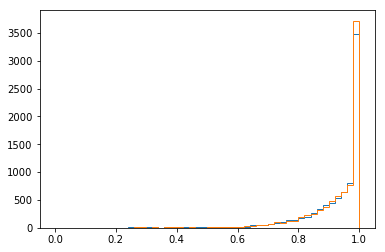

In [27]:
plt.hist(pt123_frac, 50, range=(0,1), histtype='step', label='CUETP8M1 (2016)');
plt.hist(pt123_frac_cp5, 50, range=(0,1), histtype='step', label='CP5 (2017)');
plt.show()

29166
29166
9998
29166


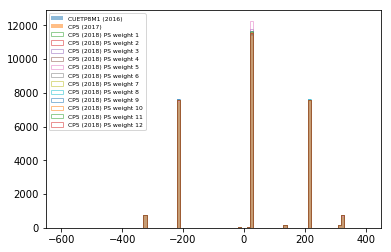

In [53]:
bins = 100
range=(-600,400)
print len(leading_pdgids_cp5)
corr_weights = []
num_two = 0
# Need a weight for each PDG ID, entered multiple times per event
for i, entry in enumerate(num_constituents_cp5):
    if entry == 1:
        corr_weights.append(weights_cp5[i])
    elif entry == 2:
        corr_weights.append(weights_cp5[i])
        corr_weights.append(weights_cp5[i])
    else:
        corr_weights.append(weights_cp5[i])
        corr_weights.append(weights_cp5[i])
        corr_weights.append(weights_cp5[i])
makeVariationsPlot(leading_pdgids, weights, leading_pdgids_cp5, corr_weights, bins, range);

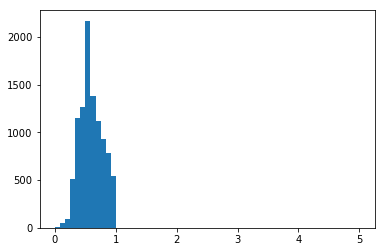

In [132]:
plt.hist(pt1_frac_cp5, bins=60, range=(0,5));

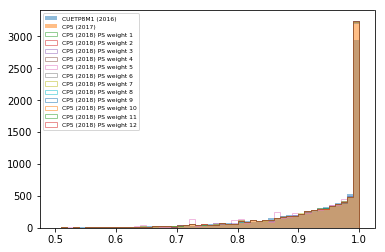

In [55]:
makeVariationsPlot(pt123_frac, weights, pt123_frac_cp5, weights_cp5, 50, (0.5,1))

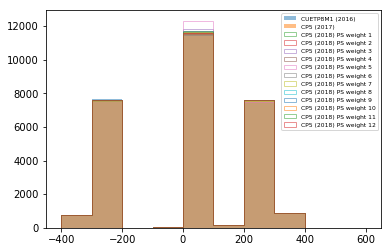

In [60]:
bins = 10
range=(-400,600)
makeVariationsPlot(leading_pdgids, weights, leading_pdgids_cp5, corr_weights, bins, range);